In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [71]:
import warnings 
warnings.filterwarnings("ignore")

In [9]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [11]:
x

array([[ -3.44236062, -10.81776417],
       [ -1.90916278, -12.45712862],
       [  2.55151521, -10.53841207],
       ...,
       [  2.75845673,  -9.45900463],
       [ -2.96345   , -11.55045903],
       [ -2.32363631, -10.18415501]])

In [13]:
y

array([2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 1,
       1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0,
       1, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2,
       0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2,
       0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2,
       0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1,

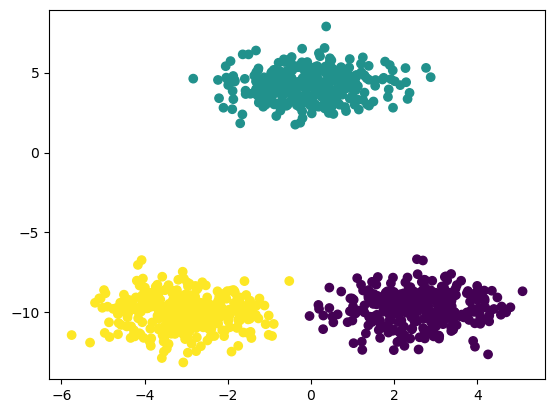

In [15]:
plt.scatter(x[:,0],x[:,1],c=y)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [21]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit(x_test)

In [23]:
from sklearn.cluster import KMeans


In [73]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [29]:
wcss

[1339.999999999999,
 684.5416336212808,
 110.32548460870521,
 88.81893621432855,
 68.2572214094678,
 47.912316965252664,
 41.69961246533415,
 36.04789784375192,
 31.199605467231855,
 29.219899408535504]

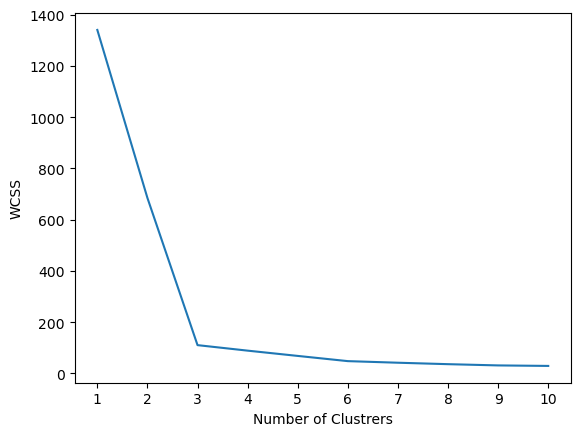

In [31]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [33]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [75]:
kmeans.fit_predict(x_train_scaled)

array([0, 0, 0, 2, 5, 0, 1, 4, 6, 2, 4, 9, 2, 0, 2, 9, 0, 1, 8, 1, 0, 9,
       1, 4, 3, 3, 0, 6, 5, 0, 3, 5, 2, 4, 3, 3, 9, 2, 9, 5, 2, 0, 6, 5,
       6, 5, 0, 3, 9, 7, 1, 0, 8, 9, 9, 5, 0, 2, 8, 1, 4, 4, 5, 9, 0, 3,
       3, 0, 9, 2, 4, 9, 5, 5, 2, 5, 5, 6, 9, 6, 6, 4, 5, 0, 5, 6, 1, 5,
       2, 3, 2, 1, 3, 4, 9, 1, 4, 3, 3, 5, 5, 4, 5, 4, 2, 3, 3, 9, 3, 3,
       6, 2, 2, 5, 4, 5, 4, 3, 5, 3, 0, 3, 9, 6, 3, 5, 1, 9, 9, 1, 1, 1,
       9, 6, 2, 1, 2, 0, 8, 5, 7, 2, 3, 4, 5, 5, 9, 3, 2, 9, 1, 4, 6, 0,
       3, 8, 0, 0, 8, 5, 1, 6, 3, 5, 9, 0, 1, 1, 9, 7, 0, 2, 1, 3, 1, 3,
       6, 4, 0, 3, 0, 0, 2, 4, 9, 9, 0, 4, 1, 3, 1, 8, 8, 2, 3, 6, 0, 4,
       5, 9, 2, 0, 2, 0, 5, 2, 4, 0, 7, 8, 7, 3, 3, 3, 1, 2, 2, 3, 2, 2,
       6, 0, 4, 1, 3, 2, 5, 8, 2, 5, 1, 1, 4, 9, 9, 9, 5, 6, 2, 0, 3, 4,
       6, 5, 3, 8, 6, 4, 2, 9, 1, 3, 5, 1, 1, 2, 2, 8, 6, 0, 2, 9, 0, 4,
       6, 8, 0, 6, 1, 9, 2, 9, 3, 0, 0, 9, 2, 3, 7, 4, 7, 6, 4, 0, 5, 7,
       5, 2, 2, 8, 0, 7, 4, 5, 2, 1, 2, 7, 9, 7, 1,

In [41]:
y_pred=kmeans.predict(x_test)

In [43]:
y_pred

array([2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0,
       1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0,
       0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0,
       1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2,
       0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0,
       1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1,
       1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2,

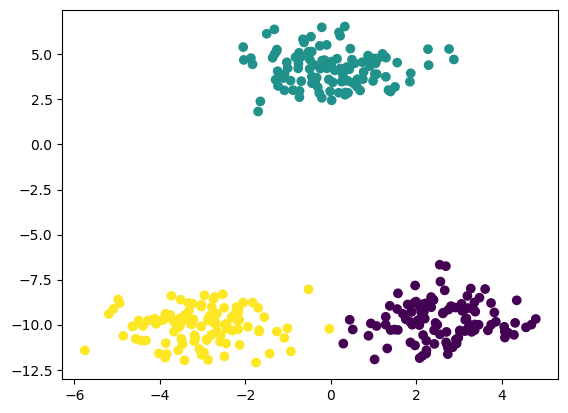

In [45]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [47]:
!pip install kneed

In [53]:
from kneed import KneeLocator

In [55]:
k1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [57]:
k1.elbow

3

In [59]:
from sklearn.metrics import silhouette_score

In [77]:
silhoute_coeff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score=silhouette_score(x_train_scaled,kmeans.labels_)
    silhoute_coeff.append(score)

In [63]:
silhoute_coeff

[0.5534028145453671,
 0.7744734129185842,
 0.6547856894320472,
 0.5610362678236723,
 0.4587773874228796,
 0.4482582264901203,
 0.4339385899495712,
 0.4097681830652759,
 0.4042067587924838]

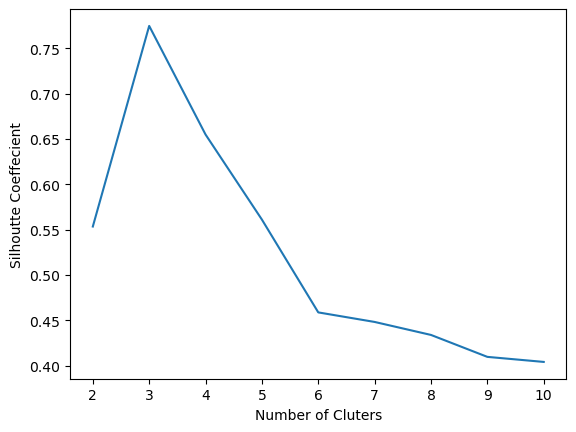

In [69]:
plt.plot(range(2,11),silhoute_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()